# Association testing using PLINK

In this practical, we will go through the steps of performing association tests in plink and adjusting for principle components.


## How to make this notebook work

* In this notebook we will use both the `command line bash` commands and `R` to setup the file folders.
* Having to shift between two languages, you need to choose a kernel every time we shift from one language to another. A kernel contains a programming language and the necessary packages to run the course material. To choose a kernel, go on the menu on the top of the page and select `Kernel --> Change Kernel`, and then select the preferred one. We will shift between two kernels, and along the code in this notebook you will see a picture telling you to change kernel. The two pictures are below:

<img src="img/bash.png" alt="Bash" width="80"> Shift to the `Bash` kernel

<img src="img/R.png" alt="R" width="80"> Shift to the `popgen course` kernel

* You can run the code in each cell by clicking on the run cell sign in the toolbar, or simply by pressing <kbd>Shift</kbd>+<kbd>Enter</kbd>. When the code is done running, a small green check sign will appear on the left side.
* You need to run the cells in sequential order to execute the analysis. Please do not run a cell until the one above is done running, and do not skip any cells
* The code goes along with textual descriptions to help you understand what happens. Please try not to focus on understanding the code itself in too much detail - but rather try to focus on the explanations and on the output of the commands 
*   You can create new code cells by pressing `+` in the Menu bar above or by pressing <kbd>B</kbd> after you select a cell. 

## Background material

- [Marees et al 2018](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6001694/), another tutorial on QC and statistical analysis of GWAS data

## Software:

We will be using `plink`, a comprehensive tool for handling and analyzing SNP data that can perform many different kinds of analyses. Check the documentation [here](https://www.cog-genomics.org/plink/1.9/)
If you want info about a specific command you can also use help command:
```
plink --help <name_of_command>
```

## Data:

We will use a simulated date set of 47 cases and 41 controls. You can find it in:

```
Data/GWAS/GWAS_test/gwa.bim
Data/GWAS/GWAS_test/gwa.bed
Data/GWAS/GWAS_test/gwa.fam
```

We create the `Results` folder and a link to the data

<img src="img/bash.png" alt="Bash" width="80"> Shift to the `Bash` kernel

In [1]:
ln -s ../../Data/GWAS/GWAS_test/
mkdir -p Results

# Test for association with disease status using a Fisher’s exact test

To test for association between SNPs and disease status using an allelic Fisher’s exact test, type the following command at the shell prompt:

In [2]:
plink --bfile GWAS_test/gwa --assoc fisher --out Results/gwa

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Results/gwa.log.
Options in effect:
  --assoc fisher
  --bfile GWAS_test/gwa
  --out Results/gwa

385583 MB RAM detected; reserving 192791 MB for main workspace.
119615 variants loaded from .bim file.
88 people (44 males, 44 females) loaded from .fam.
88 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 88 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996593.
119615 variants and 88 people pass filters and QC.
Among remaining phenotypes, 47 are cases and 41 are controls.
Writing C/C --assoc report to Results/gwa.assoc.f

**Q1)** Take a look at the output file `gwa.assoc.fisher`. What is the p-value and location of the most significant variant?

**Q2)** Is the most significant variant significant if you do Bonferroni correction?

Other multiple testing corrections:

In [3]:
plink --bfile GWAS_test/gwa --assoc fisher --adjust --out Results/gwa

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Results/gwa.log.
Options in effect:
  --adjust
  --assoc fisher
  --bfile GWAS_test/gwa
  --out Results/gwa

385583 MB RAM detected; reserving 192791 MB for main workspace.
119615 variants loaded from .bim file.
88 people (44 males, 44 females) loaded from .fam.
88 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 88 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996593.
119615 variants and 88 people pass filters and QC.
Among remaining phenotypes, 47 are cases and 41 are controls.
Writing C/C --assoc report to Results/

## Make plots

<img src="img/R.png" alt="R" width="80"> Shift to the `popgen course` kernel

We will use the `R` package `qqman` to make Manhattan plots and qq-plots. You can read in the association results and make a Manhattan plot by typing:



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





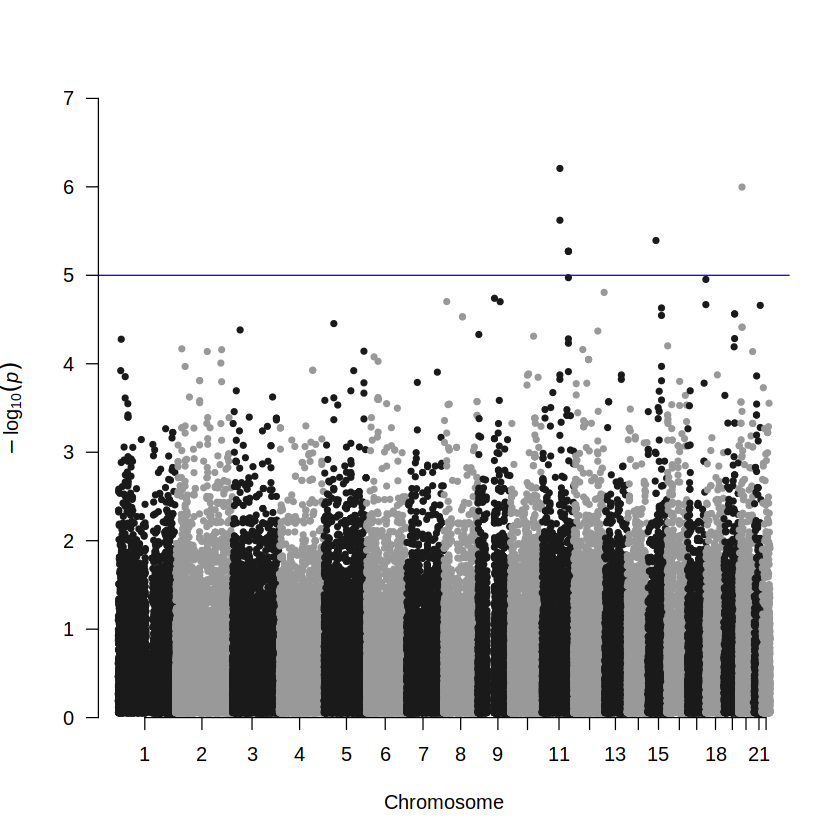

In [2]:
library(qqman)
d <- read.table('Results/gwa.assoc.fisher', head=T)
manhattan(d)

**Q3)** Are there other variants close to the most significant variant that are also associated with the disease?

To make a QQ-plot you should use the `qq` function:

In [ ]:
qq(d$P)

**Q4)** Is there a general inflation of the test statistic?

## Genomic Control.T
The inflation factor (𝝺) can be calculated as the median of the Chi-squared statistics computed divided by the median of the Chi-squared distribution under the null. Given a p-value, saved in `d$P`, the corresponding Chi-squared quantile can be calculated as:

In [3]:
Q <- qchisq(d$P, df=1, lower.tail = F)

**Q5)** What is the inflation factor?

To do genomic control (to adjust for inflated test statistic) you divide the Chi-squared values by the inflation factor. To turn a Chi-squared quantile (q) into a p-value you use the “pchisq” function:

In [5]:
P <- pchisq(Q, df=1, lower.tail = F)

**Q6)** What is the p-value of the most significant marker after genomic control?

## PCA

<img src="img/bash.png" alt="Bash" width="80"> Shift to the `Bash` kernel

It is best to perform the PCA on a LD-pruned set of SNPs:

In [1]:
plink --bfile GWAS_test/gwa --indep-pairwise 500kb 5 0.2 --out Results/gwa

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Results/gwa.log.
Options in effect:
  --bfile GWAS_test/gwa
  --indep-pairwise 500kb 5 0.2
  --out Results/gwa

units.
385583 MB RAM detected; reserving 192791 MB for main workspace.
119615 variants loaded from .bim file.
88 people (44 males, 44 females) loaded from .fam.
88 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 88 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996593.
119615 variants and 88 people pass filters and QC.
Among remaining phenotypes, 47 are cases and 41 are controls.
Pruned 6937 variants from ch

To use the pruned set of SNPs to calculate the relationship matrix and calculate the first 20 principle components (PCs) type:

In [3]:
plink --bfile GWAS_test/gwa --extract Results/gwa.prune.in --pca 20 --out Results/gwa

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Results/gwa.log.
Options in effect:
  --bfile GWAS_test/gwa
  --extract Results/gwa.prune.in
  --out Results/gwa
  --pca 20

385583 MB RAM detected; reserving 192791 MB for main workspace.
119615 variants loaded from .bim file.
88 people (44 males, 44 females) loaded from .fam.
88 phenotype values loaded from .fam.
--extract: 38838 variants remaining.
Using up to 63 threads (change this with --threads).
Before main variant filters, 88 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996466.
38838 variants and 88 people pass filters and QC.
Among remaining phenotypes, 47 are cases and 41 are

The command above calculates the eigenvalues and the eigenvectors, and stores them in two files (`gwa.eigenval`, `gwa.eigenvec`).

**Q7)** Load `gwa.eigenvec` into R and make a plot with the first PC on the x-axis and the second PC on the y-axis. Does it look like there is population structure in the data? How many populations?

Use the eigenvalues to compute the variance explained by each PC.
 
**Q8)** How large a percentage of the variance does the first PC approximately explain?

## Adjusting for PCs

We can use a logistic regression test to perform an association test while correcting for covariates. To include the first PC as a covariate type:

In [5]:
plink --bfile GWAS_test/gwa --logistic --covar Results/gwa.eigenvec --covar-number 1

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --bfile GWAS_test/gwa
  --covar Results/gwa.eigenvec
  --covar-number 1
  --logistic

385583 MB RAM detected; reserving 192791 MB for main workspace.
119615 variants loaded from .bim file.
88 people (44 males, 44 females) loaded from .fam.
88 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
--covar: 1 out of 20 covariates loaded.
Before main variant filters, 88 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.996593.
119615 variants and 88 people pass filters and QC.
Among remaining phenotypes, 47 are cases and 41 are

The resulting file “plink.assoc.logistic” contains p-values for both the SNPs and the covariates. To get the p-values for the SNPs should look at the rows with the value “ADD” in the “TEST” column. (It is possible to include more PCs. To include the first x covariates you can write “--covar-number 1-x”.)

**Q9)** Create Manhattan plot and QQ-plot for the new results. Does the QQ-plot look better?

**Q10)** What is the inflation factor now?